In [7]:
# import ipyparallel as ipp
from multiprocessing import Pool

import EEGAnalysis as ea
import h5py
import numpy as np
import pandas as pd
import scipy.signal as signal
import matplotlib.pyplot as plt
import re, os
from tqdm import tqdm

_dataset = h5py.File('./zhangchen-5-delta.h5', 'r')
# _dataset = h5py.File('./wuzhenwei-5-delta.h5', 'r')
# _dataset = h5py.File('./zhouchen-5-delta-tapping-lock.h5', 'r')

_dates = list(_dataset.keys())
print(_dates)

# _dataset.close()

tspec = np.linspace(-3,3,12000)

['190315', '190316', '190317', '190318', '190319', '190322', '190323']


In [41]:
_location = pd.read_csv('/media/STORAGE/EEG/electrode_layout/layout_zhangchen/zhangchen_tal_coord.td.fill.csv')
_location.head()

# _v = ['Brodmann area 17', 'Brodmann area 18', 'Brodmann area 19', ]
# _visual = np.ones(shape=(0,), dtype='int')
# for item in _v:
#     _stack = _location['Record Number'][_location['Level 5'] == item].values
#     print(item, np.unique(_stack))
#     _visual = np.hstack((_visual, _stack))
# _visual = np.unique(_visual)
# print()

# _c = ['Brodmann area 23', 'Brodmann area 24','Brodmann area 29', 'Brodmann area 30', 'Brodmann area 31', 'Brodmann area 32', 'Brodmann area 33', ]  # Cingulate,zhouchen &shuyunfan
# _c = ['Brodmann area 17', 'Brodmann area 18', 'Brodmann area 19', ]  # Visual, zhouchen
# _c = ['Brodmann area 7', ]  # PCun,zhouchen
# _c = ['Brodmann area 21']  # MTG,middle temporal gyrus, zhouchen,shuyunfan,fansulong,wuzhenwei,wangjinan
_c = ['Brodmann area 38','Brodmann area 22']  # STG, superior temporal gyrus,zhouchen,wuzhenwei,zhangchen,wangjinan
# _c = ['Brodmann area 20']  # ITG, inferior temporal gyrus,fansulong
# _c = ['Brodmann area 35', 'Brodmann area 34', 'Brodmann area 28', 'Amygdala','Hippocampus']  # PHG, Parahippocampal gyrus
# _c = ['Brodmann area 45','Brodmann area 46','Brodmann area 47']  # IFG,inferior frontal gyrus
# _c = ['Brodmann area 3','Brodmann area 2','Brodmann area 1']  # postcentral gyrus (Primary somatosensory cortex),shuyunfan
# _c = ['Brodmann area 4']  # M1,primary motor cortex, shuyunfan
# _c = ['Brodmann area 6']  # SMA, Supplementary motor area, shuyunfan
# _c = ['Brodmann area 40']  # IPL, Inferior Parietal Lobule, wuzhenwei & zhangchen
# _c = ['Brodmann area 37']  # FG, Fusigorm gyrus, wuzhenwei
# _c = ['Brodmann area 13']  # INS, Insula,wuzhenwei & zhangchen & wangjinan
# _c = ['Brodmann area 39']  # AG,Angular gyrus,zhangchen
# _c = ['Brodmann area 41']  # AC, Auditory cortex,zhangchen
# _c = ['Brodmann area 10']  # APFC, Antirior prefrontal cortex,wangjinan
# _c = ['Brodmann area 20']  # ITL, Inferior temporal lobel,wangjinan




_cingulate = np.ones(shape=(0,), dtype='int')
for item in _c:
    _stack = _location['Record Number'][_location['Level 5'] == item].values
    print(item, np.unique(_stack))
    _cingulate = np.hstack((_cingulate, _stack))
_cingulate = np.unique(_cingulate)

# _cingulate = range(90)

Brodmann area 38 []
Brodmann area 22 [ 9 28 90]


In [38]:
%%time
# _quintile_visual = []
_quintile_cingulate = []

for idate in _dates[:]:  #XXX: fansulong and wuzhenwei don't have marker in the first 2 days! skip them.
    _temp_v = []
    _temp_c = []
    
#     for chidx in _visual:
#         _entry = np.array(_dataset[idate]['2']['%03d'%chidx])
#         _quintile_entry = _entry.reshape((5,4,-1))
#         _temp_v.append(_quintile_entry)
        
    for chidx in _cingulate:
        _entry = np.array(_dataset[idate]['1']['%03d'%(chidx-1)])
        _quintile_entry = _entry.reshape((5,4,-1))
        _temp_c.append(_quintile_entry)
        
            
    
#     _quintile_visual.append(np.array(_temp_v))
    _quintile_cingulate.append(np.array(_temp_c))
    
# _quintile_visual = np.array(_quintile_visual)
_quintile_cingulate = np.array(_quintile_cingulate)


CPU times: user 20.6 s, sys: 424 ms, total: 21.1 s
Wall time: 2.14 s


In [4]:
list(_dataset[idate]['1'].keys())

['000',
 '001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '021',
 '022',
 '023',
 '024',
 '025',
 '026',
 '027',
 '029',
 '030',
 '031',
 '032',
 '033',
 '034',
 '035',
 '036',
 '037',
 '038',
 '039',
 '040',
 '041',
 '042',
 '043',
 '044',
 '045',
 '046',
 '047',
 '048',
 '049',
 '050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '056',
 '057',
 '058',
 '059',
 '060',
 '061',
 '062',
 '063',
 '064',
 '065',
 '066',
 '067',
 '068',
 '069',
 '070',
 '071',
 '072',
 '073',
 '074',
 '075',
 '076',
 '077',
 '078',
 '079',
 '080',
 '081',
 '082',
 '083',
 '084',
 '085',
 '086',
 '087',
 '088',
 '089',
 '090']

100%|██████████| 280/280 [00:01<00:00, 270.17it/s]


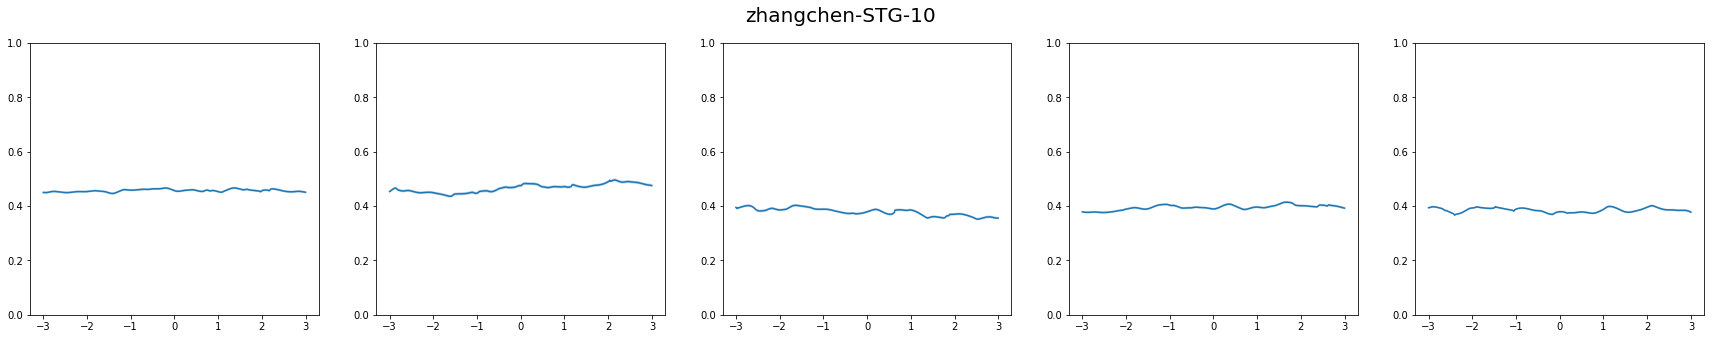

In [42]:
#####

_itpc_cingulate = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: []
}

pbar = tqdm(total=np.size(_quintile_cingulate, 0)*np.size(_quintile_cingulate, 1)*np.size(_quintile_cingulate, 2))
for chidx in range(np.size(_quintile_cingulate, 1)):
    for qi in range(np.size(_quintile_cingulate, 2)):
        for idate in range(np.size(_quintile_cingulate, 0)):
            _itpc_cingulate[qi].append(ea.decomposition.dwt_itpc([_quintile_cingulate[idate, chidx, qi, :, :]])[0])
            pbar.update(1)
pbar.close()

plt.figure(figsize=(6*5, 5))

for qi in _itpc_cingulate.keys():
    _itcp_pack = np.array(_itpc_cingulate[qi])
    
    plt.subplot(1,5,qi+1)
    _curve = np.mean(_itcp_pack, 0)
    _sem = np.std(_itcp_pack, 0) / np.size(_itcp_pack, 0)
    
    plt.plot(tspec, _curve)
    plt.fill_between(tspec, _curve-_sem, _curve+_sem, alpha=0.3)
#     plt.vlines([0.25], 0, 1)
#     plt.plot(tspec, _itcp_pack.T, alpha=0.05, c='k')
    plt.ylim((0, 1))

plt.suptitle('zhangchen-STG-10',fontsize = 20)
plt.savefig('./ITPC_seq_export_phase/zhangchen-STG-10.png')
plt.savefig('./ITPC_seq_export_phase/zhangchen-STG-10.eps')
plt.show()

---
# DEV

100%|██████████| 272/272 [00:00<00:00, 302.34it/s]


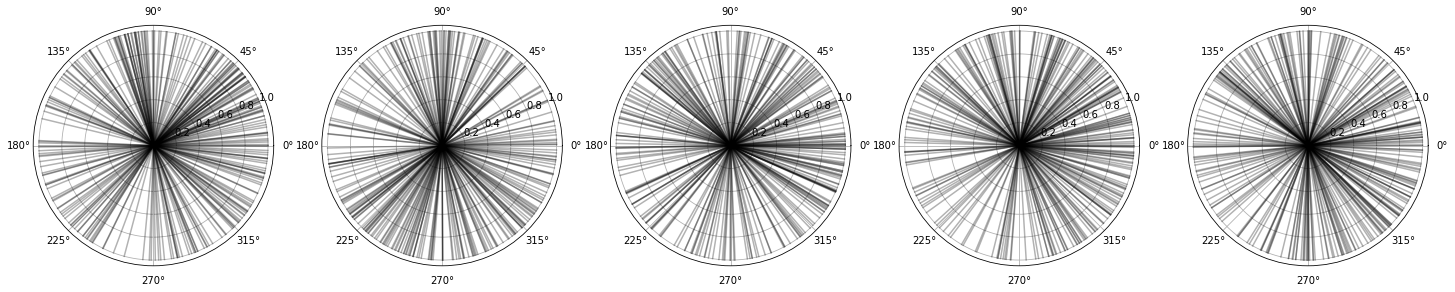

In [114]:
_itpc_ori = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: []
}

pbar = tqdm(total=np.size(_quintile_cingulate, 0)*np.size(_quintile_cingulate, 1)*np.size(_quintile_cingulate, 2))
for qi in range(np.size(_quintile_cingulate,2)):
    for idate in range(np.size(_quintile_cingulate,0)):
        for chidx in range(np.size(_quintile_cingulate,1)):
            _itpc_ori[qi].append(np.angle(_quintile_cingulate[idate,chidx,qi,:,:]))
            pbar.update(1)
pbar.close()

plt.figure(figsize=(5*5,5))
for qi in range(5):

    plt.subplot(1,5,qi+1, projection='polar')
    _ori= np.array(_itpc_ori[qi]).reshape((-1, 12000))[:, 6500]
    [plt.polar([0, item], [0, 1], 'k', alpha=0.3) for item in tqdm(_ori)]
    
plt.show()

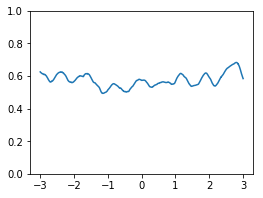

In [20]:
_itpc_visual = []

# pbar = tqdm(total=np.size(_quintile_visual, 0)*np.size(_quintile_visual, 1)*np.size(_quintile_visual, 2))
for chidx in range(np.size(_quintile_cingulate, 1)):
    for idate in range(np.size(_quintile_cingulate, 0)):
        _itpc_visual.append(ea.decomposition.dwt_itpc(_quintile_cingulate[idate, chidx, :, :, :].reshape((1,-1,12000)))[0])
#         pbar.update(1)
# pbar.close()

plt.figure(figsize=(4, 3))

# for qi in _itpc_visual.keys():
#     _itcp_pack = np.array(_itpc_visual[qi])
    
#     plt.subplot(1,5,qi+1)
_curve = np.mean(_itcp_pack, 0)
_sem = np.std(_itcp_pack, 0) / np.size(_itcp_pack, 0)

plt.plot(tspec, _curve)
plt.fill_between(tspec, _curve-_sem, _curve+_sem, alpha=0.3)
# plt.plot(tspec, _itcp_pack.T, alpha=0.05, c='k')
plt.ylim((0, 1))
    
plt.show()

### Behavior cross Brain Area

In [ ]:
_behavior = pd.read_csv('zhouchen-behavior.csv', dtype={'date':'str'})
check_behavior_prediction = lambda x,y,z: _behavior.time[(_behavior.paradigm == x) & (_behavior['date'] == y)].values < z
_behavior.head()

In [ ]:
%%time
_visual_with = []
_cingulate_with = []
_visual_without = []
_cingulate_without = []

for idate in _dates:
    _temp_v = []
    _temp_c = []
    _prediction = check_behavior_prediction('1-5', idate, 5)
    
    for chidx in _visual:
        _entry = np.array(_dataset[idate]['1']['%03d'%chidx])
        _quintile_entry = _entry[_prediction]
        _visual_with.append(_quintile_entry)
        
    for chidx in _cingulate:
        _entry = np.array(_dataset[idate]['1']['%03d'%chidx])
        _quintile_entry = _entry.reshape((5,4,-1))
        _temp_c.append(_quintile_entry)
    
    
    _quintile_visual.append(np.array(_temp_v))
    _quintile_cingulate.append(np.array(_temp_c))
    
_quintile_visual = np.array(_quintile_visual)
_quintile_cingulate = np.array(_quintile_cingulate)